In [1]:
import copy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Datasets/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(columns=["Id"])
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.describe(include=['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [6]:
df["SepalAreaCm2"] = df["SepalLengthCm"] * df["SepalWidthCm"]
df["PetalAreaCm2"] = df["PetalLengthCm"] * df["PetalWidthCm"]

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalAreaCm2,PetalAreaCm2
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [8]:
"""
Zscore normalization: (xi - mu) / sigma.
"""
def scale(xi, mu, sigma):
    return (xi-mu)/sigma

def normalize(nparr):
    mu = nparr.mean(axis=0)
    sigma = nparr.std(axis=0)
    return mu, sigma, (nparr-mu)/sigma

In [9]:
X = df[df.columns[:-3]].join(df[df.columns[-2:]])
mu, sigma, X_norm = normalize(X)
Y = df[df.columns[-3]]

In [10]:
X = df.drop(columns=["Species"])
Y = df["Species"]
mu, sigma, X_norm = normalize(X)

In [11]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalAreaCm2,PetalAreaCm2
0,5.1,3.5,1.4,0.2,17.85,0.28
1,4.9,3.0,1.4,0.2,14.70,0.28
2,4.7,3.2,1.3,0.2,15.04,0.26
3,4.6,3.1,1.5,0.2,14.26,0.30
4,5.0,3.6,1.4,0.2,18.00,0.28


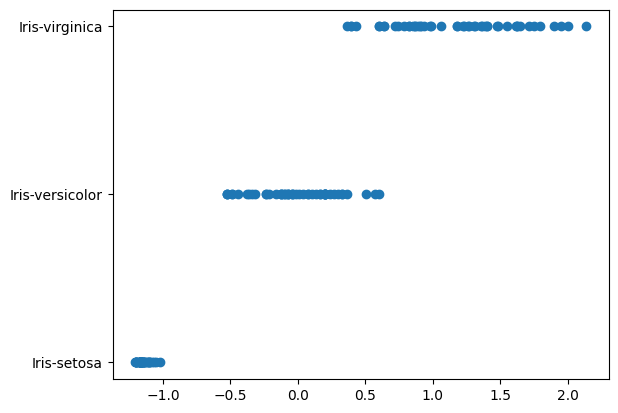

In [12]:
plt.scatter(X_norm["PetalAreaCm2"], Y)

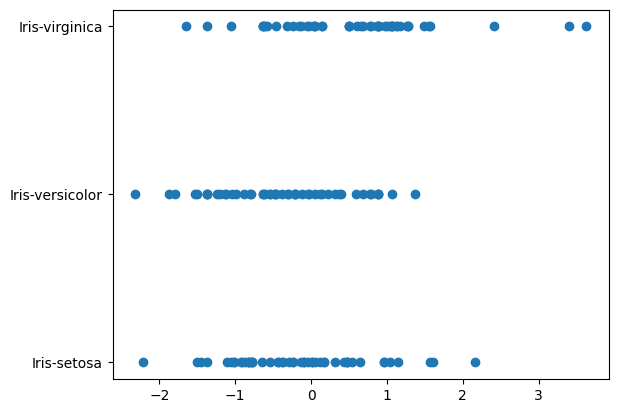

In [13]:
plt.scatter(X_norm["SepalAreaCm2"], Y)

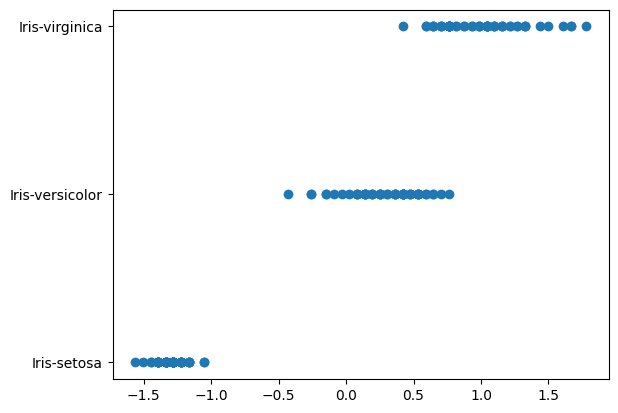

In [14]:
plt.scatter(X_norm["PetalLengthCm"], Y)

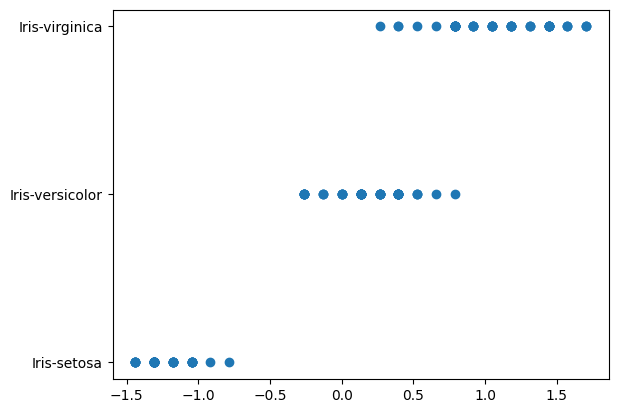

In [15]:
plt.scatter(X_norm["PetalWidthCm"], Y)

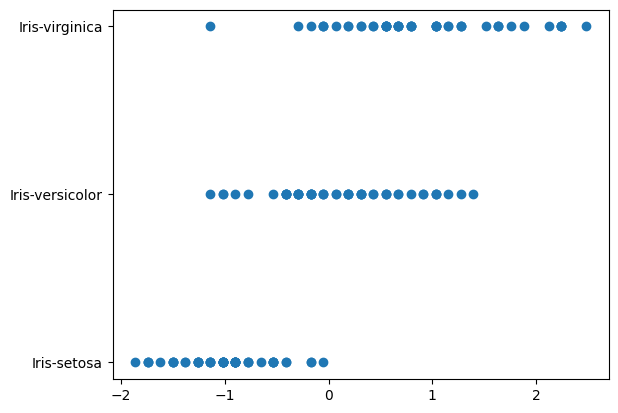

In [16]:
plt.scatter(X_norm["SepalLengthCm"], Y)

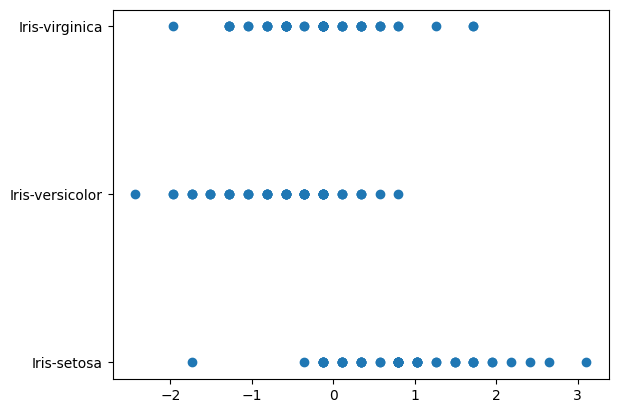

In [17]:
plt.scatter(X_norm["SepalWidthCm"], Y)

In [18]:
"""f(w, b, x) = dot(w, x) + b"""
def f(w, b, x):
    fx = np.dot(w, x) + b
    return 1 / (1 + math.exp(-fx))

"""Squared Error Cost Function"""
def j(w, b, X, Y):
    cost = 0
    n =  X.shape[0]
    for i in range(n):
        cost += -Y[i]*math.log(f(w, b, X[i])) - (1-Y[i])*math.log(1-f(w, b, X[i]))
    return cost/n

In [19]:
"""Gradient Calculator"""
def gradient(w, b, X, Y):
    n, m = X.shape
    dj_dw, dj_db = np.zeros(m), 0
    for i in range(n):
        err = f(w, b, X[i]) - Y[i]
        for j in range(m):
            dj_dw[j] += err*X[i, j]
        dj_db += err
    
    dj_dw /= n
    dj_db /= n

    return dj_dw, dj_db

"Gradient Descent Algorithm"
def gradient_descent(a, X, Y, epsilon=1e-3, maxiter=1000):
    n, m = X.shape

    w, b = np.zeros(m), 0
    prev_cost = j(w, b, X, Y)
    cost_hist = [prev_cost, ]
    format = '{:10} {:10}'
    print   (format.format("Iteration", "Cost"))
    for i in range(maxiter):
        dj_dw, dj_db = gradient(w, b, X, Y)

        w -= a*dj_dw
        b -= a*dj_db

        cost = j(w, b, X, Y)

        if (i % 1000 == 0):
            print(format.format(i, cost))
            cost_hist.append(cost)

        if ((prev_cost - cost) < epsilon):
            break
        prev_cost = cost


    return (w, b), cost_hist

In [20]:
Z = copy.copy(Y)
Y = Y.replace("Iris-setosa", 1)
Y = Y.replace("Iris-virginica", 0)
Y = Y.replace("Iris-versicolor", 0)
Y

/tmp/ipykernel_26972/1608429586.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y = Y.replace("Iris-versicolor", 0)


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: int64

In [21]:
X = X.to_numpy()
Y = Y.to_numpy()

In [22]:
(w, b), cost_hist = gradient_descent(1e-2, X, Y, epsilon=1e-9, maxiter=100000)

print(f"{w = }")
print(f"{b = }")

Iteration  Cost      
         0 0.5737311458262939
      1000 0.01565852065530165
      2000 0.008587644738361983
      3000 0.006034907822257162
      4000 0.0046980164945112455
      5000 0.003868780545888062
      6000 0.0033013395104809547
      7000 0.0028871851191083976
      8000 0.002570790063304863
      9000 0.0023207056210331404
     10000 0.0021177479872991852
     11000 0.0019495308663495655
     12000 0.0018076891221903246
     13000 0.0016863633374733882
     14000 0.0015813232502000165
     15000 0.0014894359936523346
     16000 0.0014083303841873145
     17000 0.0013361776707976752
     18000 0.0012715441040350348
     19000 0.0012132892480180915
     20000 0.0011604942601065678
     21000 0.0011124102969344478
     22000 0.0010684207386775942
     23000 0.001028013089408758
     24000 0.000990757774236209
     25000 0.0009562919316912403
     26000 0.0009243068772231717
     27000 0.0008945383008014105
     28000 0.0008667585257694695
     29000 0.000840770339219328


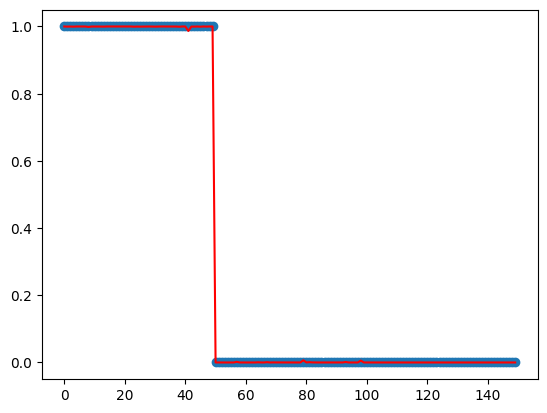

In [23]:
y = [f(w, b, x) for x in X[:]]
plt.plot(y, c="r")
plt.scatter(range(len(Y)), Y)
plt.show()